In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


**Importing the numpy, keras libraries for mathematical computational and building convolutional neural network respectively**

**Importing MNIST dataset**

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist


**Load pre-shuffled MNIST data into train and test sets**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Printing the shape of the train dataset. It says that there are 60000 images of dimension 28X28X3**

(60000, 28, 28)


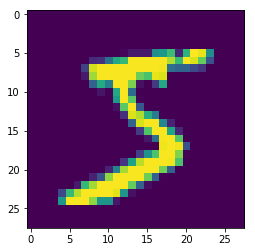

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshaping the RGB image to gray scale**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

**Normalizing the grey scale image, where 0 represents black and 255 represents white**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Printing the dependent varaible, which we are trying to predict**

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**Convert 1-dimensional class arrays to 10-dimensional class matrices**

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

**Printing the dependent after converting it into 10-dimensional**

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Building Convolutional network such that the parameters used are less than 15000. The global receptive field is maintained as the size of the image.**


# ***Convolution Neural Network 1: Vanilla Network***

**Network architecture is the same as that in assignment 3, except that the number of kernels used in this network are less.** 



In [0]:
from keras.layers import Activation, MaxPooling2D
from numpy.random import seed
seed(1)
model = Sequential() 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # I/P=28X28X1 | (3X3X1)X10 | O/P 26X26X10 | RF=3X3
model.add(Convolution2D(20, 3, 3, activation='relu'))                        # I/P= 26X26X10 | (3X3X18)X20 | O/P 24X24X20 | RF=5X5
model.add(MaxPooling2D(pool_size=(2, 2)))                                    # I/P= 24X24X20 | MP (2X2) | O/P 12X12X20 | RF=10X10
model.add(Convolution2D(20,3,3, activation='relu'))                          # I/P= 12X12X20 | (3X3X20)X20 | O/P 10X10X20 | RF=12X12
model.add(MaxPooling2D(pool_size=(2, 2)))                                    # I/P= 10X10X20 | MP (2X2) | O/P 5X5X20 | RF=24X24
model.add(Convolution2D(20, 3, 3, activation='relu'))                        # I/P= 5X5X20 | MP (3X3X22)X20 | O/P 3X3X20 | RF=26X26
model.add(Convolution2D(10, 1, 1, activation='relu'))                        # I/P= 3X3X20 | (1X1X20)X10 | O/P 3X3X10 | RF=26X26
model.add(Convolution2D(10, 3, 3))                                           # I/P= 3X3X10 |  (3X3X10)X10 | O/P 1X3X10 | RF=28X28
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 20)        3620      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 20)          3620      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 10)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-pa

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

**Training the model by setting the batch size and number of epochs**

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 330us/step - loss: 0.2352 - acc: 0.9262 - val_loss: 0.0728 - val_acc: 0.9758
Epoch 2/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.0796 - acc: 0.9759 - val_loss: 0.0503 - val_acc: 0.9834
Epoch 3/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.0604 - acc: 0.9819 - val_loss: 0.0490 - val_acc: 0.9845
Epoch 4/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.0492 - acc: 0.9849 - val_loss: 0.0466 - val_acc: 0.9854
Epoch 5/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.0427 - acc: 0.9864 - val_loss: 0.0458 - val_acc: 0.9844
Epoch 6/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0356 - acc: 0.9888 - val_loss: 0.0493 - val_acc: 0.9843
Epoch 7/20
60000/6000

**Evaluating the trained model on the dataset**

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.055512672307605954, 0.9869]


**ACCURACY OF NETWORK 1: 99.03 (11th Epoch)**

****
**RESULT OF NETWORK 1:**

For network 1,  we can observe that the training accuracy is more than the validation accuracy indicating model overfitting. 
*****
**NEXT STEP:**

Therefore, as a next step of improvement Batch Normalization and drop out are added to the network. Drop outhelps in reducing the model overfitting by adding noise at each layer. By adding dropout, we lose some information. But when we use batch normalization(which helps in reducing covariance shift) less dropout can be used to avoid losing lot of information 
*******
**NETWORK 2: ADDING BATCH NORMALIZATION AND DROP OUT**

As a second step, batch normalization and drop out are added after each convolution. Drop out of 0.1 is added at the end of each convolution. This means that a particular neuron is retained with probability of 0.1 after the training.
****

# **CNN 2**

In [0]:
from keras.layers import Activation, MaxPooling2D
model = Sequential() 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # I/P=28X28X1   | (3X3X1)X10  | O/P 26X26X10 | RF=3X3
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3, activation='relu'))                        # I/P= 26X26X10 | (3X3X18)X20 | O/P 24X24X20 | RF=5X5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))                                    # I/P= 24X24X20 | MP (2X2)    | O/P 12X12X20 | RF=10X10
model.add(Convolution2D(20,3,3, activation='relu'))                          # I/P= 12X12X20 | (3X3X20)X20 | O/P 10X10X20 | RF=12X12
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))                                    # I/P= 10X10X20 | MP (2X2)    | O/P 5X5X20   | RF=24X24
model.add(Convolution2D(20, 3, 3, activation='relu'))                        # I/P= 5X5X20   | (3X3X20)X20 | O/P 3X3X20   | RF=26X26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, 1, activation='relu'))                        # I/P= 3X3X20   | (1X1X20)X10 | O/P 3X3X10   | RF=26X26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 3, 3))                                           # I/P= 3X3X10   | (3X3X10)X10 | O/P 1X1X10   | RF=28X28
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/li

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 20)        1820      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 20)        80        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 20)       

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.023711118094769335, 0.9928]


**ACCURACY OF NETWORK 2: 99.36 (Epoch 13)**
******
**RESULT OF NETWORK 2:**

We can see that overfitting is vanished now
*******
**NEURAL NETWORK 3:**
Increasing the number of kernels and Dropout of 0.25 only after Maxpooling
*************


# CNN3

In [0]:
from keras.layers import Activation, MaxPooling2D
model = Sequential() 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))    # I/P=28X28X1    | (3X3X1)X16     | O/P 26X26X16 | RF=3X3
model.add(BatchNormalization())

model.add(Convolution2D(20, 3, 3, activation='relu'))                           # I/P= 26X26X16  | (3X3X16)X20    | O/P 24X24X20 | RF=5X5
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))                                       # I/P= 24X24X20  | MP (2X2)       | O/P 12X12X20 | RF=10X10
model.add(Dropout(0.25))
model.add(Convolution2D(22,3,3, activation='relu'))                             # I/P= 12X12X20  | (3X3X20)X22    | O/P 10X10X22 | RF=12X12
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))                                       # I/P= 10X10X22  | MP (2X2)       | O/P 5X5X22   | RF=24X24
model.add(Dropout(0.25))
model.add(Convolution2D(24, 3, 3, activation='relu'))                           # I/P= 5X5X22    | (3X3X22)X24    | O/P 3X3X24   | RF=26X26
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, 1, activation='relu'))                           # I/P= 3X3X24    | (1X1X24)X10    | O/P 3X3X10   | RF=26X26
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3))                                              # I/P= 3X3X10    |  (3X3X10)X10   | O/P 1X1X10   | RF=28X28
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1,

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 20)        2900      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 20)        80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 22)       

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.025668010003571544, 0.993]


**ACCURACY OF NETWORK 3: 99.3 (Epoch 20)**
*****************
**RESULT OF NETWORK 3:**

The model accuracy has reduced from 99.36 to 99.3. We can also see that the gap between training accuracy and validation accuracy is less. This may be because of the increase in number of kernels.

******************

**NEURAL NETWORK 4:**

As a next step, number of kernels are set equal to that in the network 2 and Learning rate has been changed.
******************

# CNN 4

In [0]:
from keras.layers import Activation, MaxPooling2D
model = Sequential() 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))    # I/P= 28X28X1   | (3X3X1)X10   | O/P 26X26X10 | RF=3X3
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu'))                           # I/P= 26X26X10  | (3X3X10)X20  | O/P 24X24X20 | RF=5X5
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))                                       # I/P= 24X264X20 | MP (2X2)     | O/P 12X12X20 | RF=10X10
model.add(Dropout(0.25))
model.add(Convolution2D(20,3,3, activation='relu'))                             # I/P= 12X12X20  | (3X3X20)X20  | O/P 10X10X20 | RF=12X12
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))                                       # I/P= 10X10X20  | MP (2X2)     | O/P 5X5X20   | RF=24X24
model.add(Dropout(0.25))
model.add(Convolution2D(20, 3, 3, activation='relu'))                           # I/P= 5X5X20    | (3X3X20)X20  | O/P 3X3X20   | RF=26X26
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, 1, activation='relu'))                           # I/P= 3X3X20    | (1X1X20)X10  | O/P 3X3X10   | RF=26X26
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3))                                              # I/P= 3X3X10    |  (3X3X10)X10 | O/P 1X1X10   | RF=28X28
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel impo

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 20)        1820      
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 20)       

In [0]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

10000/10000 [==============================] - 1s 112us/step
[0.01689683752369747, 0.994]


# Accuracy of 99.4 is achieved with 10600 parameters.